In [1]:
library(statsr)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'tidyr' was built under R version 3.4.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
data(kobe_basket)

In [3]:
dim(kobe_basket)

[1] 133   6

In [4]:
names(kobe_basket)

[1] "vs"          "game"        "quarter"     "time"        "description"
[6] "shot"

In [5]:
head(kobe_basket)

vs,game,quarter,time,description,shot
ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
ORL,1,1,9:07,Kobe Bryant misses jumper,M
ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher assists),H
ORL,1,1,7:03,Kobe Bryant makes driving layup,H
ORL,1,1,6:01,Kobe Bryant misses jumper,M


In [6]:
summary(kobe_basket)

   vs           game       quarter       time    
 ORL:133   Min.   :1.000   1  :36   0:00   :  3  
           1st Qu.:1.000   1OT: 7   0:04   :  2  
           Median :3.000   2  :25   11:00  :  2  
           Mean   :2.902   3  :34   1:20   :  2  
           3rd Qu.:4.000   4  :31   2:17   :  2  
           Max.   :5.000            3:33   :  2  
                                    (Other):120  
                                   description      shot          
 Bryant 3pt Shot: Missed                 :  5   Length:133        
 Kobe Bryant misses layup                :  5   Class :character  
 Kobe Bryant makes 11-foot two point shot:  4   Mode  :character  
 Kobe Bryant makes 20-foot jumper        :  4                     
 Kobe Bryant misses 19-foot jumper       :  4                     
 Kobe Bryant misses 20-foot jumper       :  4                     
 (Other)                                 :107                     

In [11]:
kobe_basket %>%
filter(game == 1) %>%
arrange(quarter, desc(time))

vs,game,quarter,time,description,shot
ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
ORL,1,1,9:07,Kobe Bryant misses jumper,M
ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher assists),H
ORL,1,1,7:03,Kobe Bryant makes driving layup,H
ORL,1,1,6:01,Kobe Bryant misses jumper,M
ORL,1,1,4:07,Kobe Bryant misses 12-foot jumper,M
ORL,1,1,0:52,Kobe Bryant misses 19-foot jumper,M
ORL,1,1,0:00,Kobe Bryant misses layup,M
ORL,1,2,6:35,Kobe Bryant makes jumper,H


In [15]:
kobe_streak <- calc_streak(kobe_basket$shot)

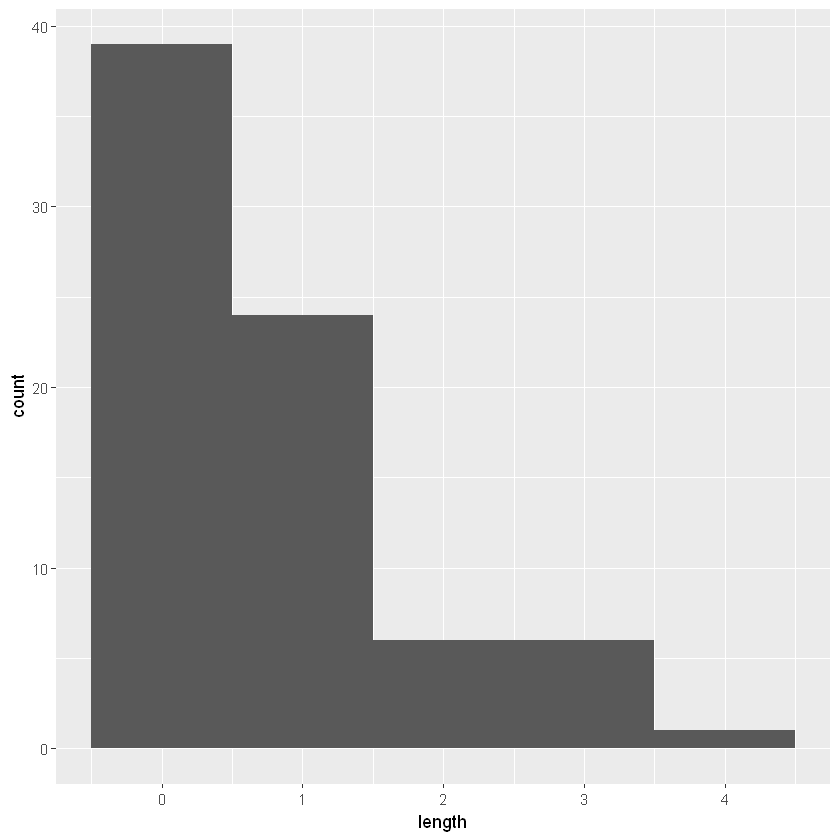

In [66]:
ggplot(kobe_streak, aes(length)) +
geom_histogram(binwidth = 1)

In [25]:
kobe_basket %>%
mutate(is_hit = (shot == 'H')) %>%
summarize(hit_p = mean(is_hit))

hit_p
0.4360902


In [26]:
mean(kobe_streak$length)

[1] 0.7631579

In [27]:
coin_outcomes <- c('head', 'tail')
sim_unfair_coin <- sample(coin_outcomes, size = 100, replace = TRUE,
                         prob = c(0.2, 0.8))
table(sim_unfair_coin)

sim_unfair_coin
head tail 
  17   83 

In [31]:
shot_outcomes <- c('H', 'M')
sim_basket <- sample(shot_outcomes, size = 133, replace = TRUE,
                   prob = c(0.45, 0.55))

In [32]:
table(sim_basket)

sim_basket
 H  M 
64 69 

In [33]:
sim_streak <- calc_streak(sim_basket)

In [35]:
mean(sim_streak$length)

[1] 0.9142857

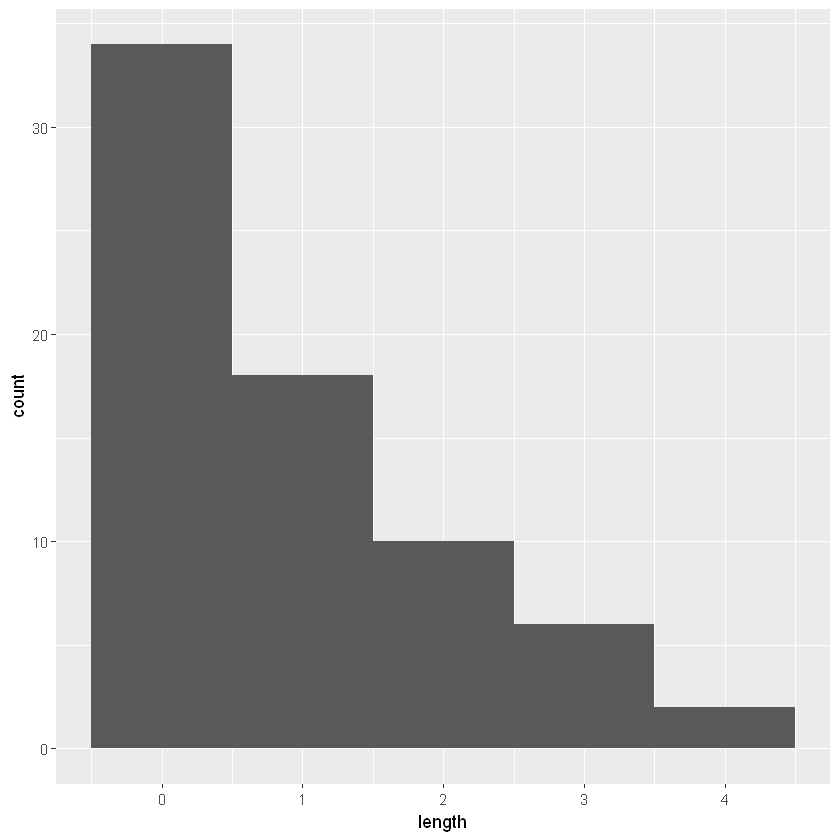

In [67]:
ggplot(sim_streak, aes(length)) + 
geom_histogram(binwidth = 1)

In [52]:
koby_streak_count <- kobe_streak %>%
group_by(length) %>%
summarize(kobe = n())

In [53]:
sim_streak_count <- sim_streak %>%
group_by(length) %>%
summarize(sim = n())

In [57]:
library(reshape2)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



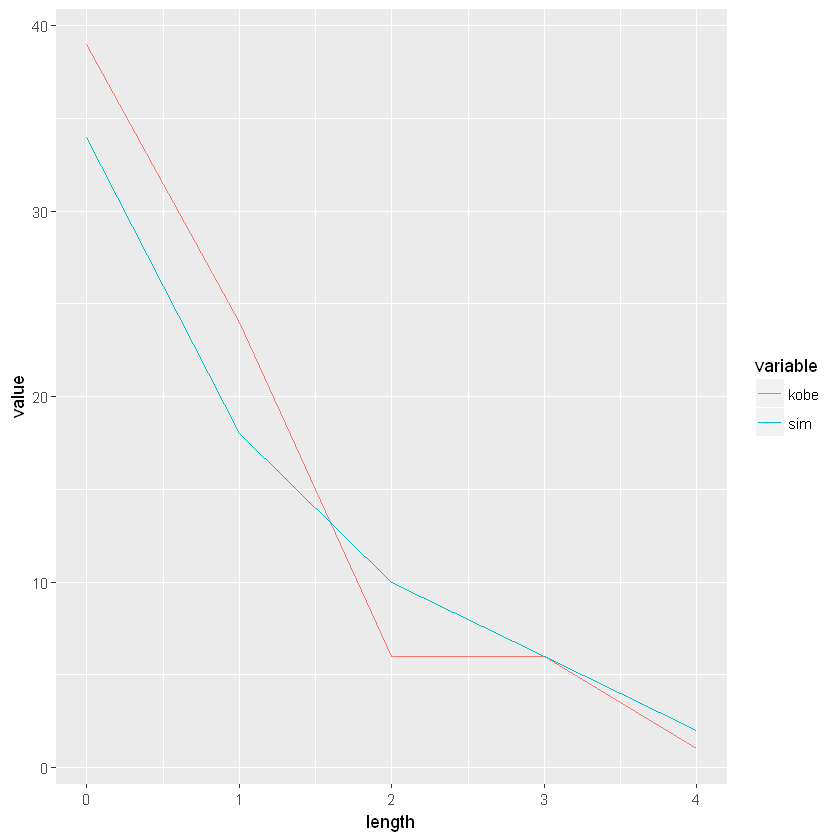

In [69]:
merge(koby_streak_count, sim_streak_count, by = 'length') %>%
melt(measure.var = c('kobe', 'sim')) %>%
ggplot(aes(length, value, color = variable)) +
geom_freqpoly(stat = 'identity', position = 'identity')